In [1]:
# Importação de Bibliotecas 
import pandas as pd 
import spacy
import os
import matplotlib.pyplot as plt
import regex as re
from nltk.tokenize import TreebankWordTokenizer
from wordcloud import WordCloud
from collections import Counter

# Variáveis globais
t = TreebankWordTokenizer()
nlp = spacy.load('en_core_web_sm')


In [2]:
current_dir = os.getcwd()
df_path = os.path.join(current_dir, '..', 'Dados_NLP', 'df_completo.xlsx')
df = pd.read_excel(df_path)

<h1> Seleção de artigos </h1>

<p> Para iniciar a análise, vamos selecionar alguns artigos de interesse, para diminuir o número de dados e eliminar artigos desnecessários. Para isso, faremos uma filtragem com palavras-chave; 'alcohol', 'cancer', 'consumption' e 'ethanol'. Os artigos que não apresentarem as palavras-chave no abstract, não são considerados de interesse </p>

In [3]:
# Seleciona um grupo de artigos
artigos = df.iloc[0:100]

# Selecionando os abstracts dos artigos 
abs = artigos["Abstract"]

# Remove linhas com NaN
abstracts = abs.dropna()
index = abstracts.index

#print(artigos["Article Title"])

In [4]:
for texto, num in zip(abstracts, index):

    # Flags para indicar se as palavras-chave foram encontradas em algum artigo
    found_alcohol = False
    found_cancer = False
    found_consumption = False
    found_ethanol = False
    
    # Separa o texto em tooks
    tooks = nlp(texto)

    # Eliminar letras maiusculas (Case Folding)
    tooks_ = [t.lower_ for t in tooks]

    # Buscando as palavras-chave
    for took in tooks_:
        if took == "alcohol":
            found_alcohol = True
        if took == "cancer":
            found_cancer = True
        if took == "consumption":
            found_consumption = True
        if took == "ethanol":
            found_ethanol = True
        

    # Se todas as palavras-chave forem encontradas, este é um artigo de alto interesse 
    if found_alcohol and found_cancer and found_consumption and found_ethanol:
        print(f"O artigo {num} possuí todas as palavras-chave")

    # Verificar quais palavras-chave não foram encontradas e printar o número do artigo correspondente
    if not found_alcohol:
        print(f"A palavra 'alcohol' não foi encontrada no artigo {num}.")
    if not found_cancer:
        print(f"A palavra 'cancer' não foi encontrada no artigo {num}.")
    if not found_consumption:
        print(f"A palavra 'consumption' não foi encontrada no artigo {num}.")
    if not found_ethanol:
        print(f"A palavra 'ethanol' não foi encontrada no artigo {num}.")

    #print(contador)

    print()

A palavra 'alcohol' não foi encontrada no artigo 0.
A palavra 'cancer' não foi encontrada no artigo 0.
A palavra 'consumption' não foi encontrada no artigo 0.
A palavra 'ethanol' não foi encontrada no artigo 0.

A palavra 'alcohol' não foi encontrada no artigo 1.
A palavra 'cancer' não foi encontrada no artigo 1.
A palavra 'consumption' não foi encontrada no artigo 1.
A palavra 'ethanol' não foi encontrada no artigo 1.

A palavra 'ethanol' não foi encontrada no artigo 2.

A palavra 'alcohol' não foi encontrada no artigo 3.
A palavra 'cancer' não foi encontrada no artigo 3.

A palavra 'cancer' não foi encontrada no artigo 4.

A palavra 'alcohol' não foi encontrada no artigo 5.
A palavra 'consumption' não foi encontrada no artigo 5.
A palavra 'ethanol' não foi encontrada no artigo 5.

A palavra 'cancer' não foi encontrada no artigo 6.
A palavra 'consumption' não foi encontrada no artigo 6.
A palavra 'ethanol' não foi encontrada no artigo 6.

A palavra 'alcohol' não foi encontrada no arti

<h1> Pré-processamento dos textos </h1>

<p> Foram selecionados os artigos com base nas palavra-chave. Agora, faremos um pré-processamento para entender como eles apresentam os temas de interesse </p>

In [5]:
# Artigos relacionados
lista = [2, 25, 49, 71, 83, 134, 596, 1014, 1421, 1438, 1441, 1578, 1591, 1866]

artigos = df["Abstract"][lista]

In [6]:
# Tokenização dos textos

palavras = []

for texto in artigos:

    # Eliminar letras maiusculas (Case Folding)
    txt = texto.lower()

    # Separa o texto em tokens
    toks = nlp(txt)

    # Remover stop_words
    w = [t for t in toks if not t.is_stop] 

    # Remove pontuações
    w = [token.text for token in w if not token.is_punct]
    
    # Transforma os tokens em string
    string = [str(word) for word in w]

    # Junta as strings em uma sentença
    string_resultante = ' '.join(string)
    
    # Armazena a sentença em uma lista 
    palavras.append(string_resultante)

# Junta todas as sentenças da lista em uma
texto = ' '.join(palavras)

# Remove sinais matemáticos 
texto = re.sub(r'[+\-*/=]', '', texto)

#texto

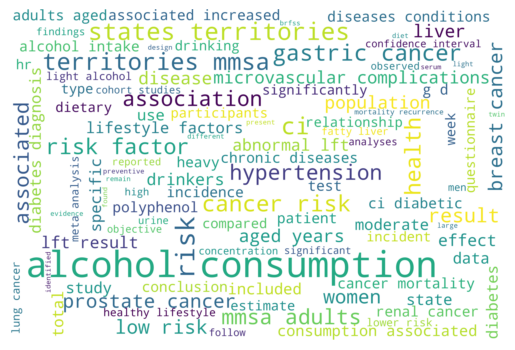

In [7]:
# Criar uma WordCloud 
wordcloud = WordCloud(width=3000, height=2000, background_color='white', max_words=100, stopwords=None).generate(texto)

# Exibir WordClound
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


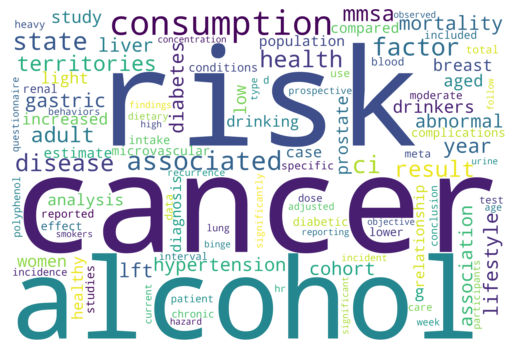

In [8]:
# Criar uma WordCloud (considerando palavras soltas, sem colocações)
wordcloud = WordCloud(width=3000, height=2000, background_color='white', max_words=100, stopwords=None, collocations=False).generate(texto)

# Exibir WordClound
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
# Verificar a contagem de palavras
contagem_palavras = Counter(texto.split())

contagem_palavras

Counter({'cancer': 76,
         'risk': 72,
         'alcohol': 68,
         'consumption': 60,
         'associated': 32,
         '95': 29,
         'health': 26,
         'ci': 26,
         'states': 25,
         'factors': 24,
         'mmsa': 23,
         'territories': 22,
         'results': 22,
         'adults': 21,
         'years': 19,
         'diabetes': 18,
         'mortality': 18,
         'lifestyle': 18,
         'gastric': 18,
         'liver': 17,
         'hypertension': 16,
         'cohort': 16,
         'abnormal': 16,
         'diseases': 15,
         'study': 14,
         'drinkers': 14,
         'aged': 13,
         '>': 13,
         'women': 13,
         'low': 13,
         'lft': 13,
         'prostate': 13,
         'breast': 13,
         'disease': 12,
         'light': 12,
         'increased': 12,
         'analysis': 12,
         'drinking': 11,
         'healthy': 11,
         'compared': 11,
         'diagnosis': 11,
         'microvascular': 11,
   